In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Finding the optimal portfolio 

In [2]:
l1=['AAPL','AMZN','META','GOOGL','IBM','INTC','MSFT','ORCL','WMT']

In [3]:
df1 = pdr.get_data_yahoo(l1, start='2019-01-01',end='2019-12-31')["Adj Close"]
df1

Symbols,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-02,38.168346,76.956497,135.679993,52.734001,91.668610,42.586582,97.147713,42.296158,87.534340
2019-01-03,34.366501,75.014000,131.740005,51.273499,89.838577,40.243771,93.573837,41.884594,87.084206
2019-01-04,35.833588,78.769501,137.949997,53.903500,93.347466,42.713207,97.925880,43.689812,87.628151
2019-01-07,35.753826,81.475502,138.050003,53.796001,94.007843,42.912212,98.050766,44.381962,88.659714
2019-01-08,36.435402,82.829002,142.529999,54.268501,95.344566,43.183582,98.761711,44.784157,89.278671
...,...,...,...,...,...,...,...,...,...
2019-12-24,69.738731,89.460503,205.119995,67.221497,112.550049,55.080460,153.433273,50.837074,114.346436
2019-12-26,71.122360,93.438499,207.789993,68.123497,112.491692,55.460579,154.690887,50.960747,114.356003
2019-12-27,71.095383,93.489998,208.100006,67.732002,112.791862,55.701633,154.973648,50.856098,114.422974


In [4]:
df1.to_csv("df1_l7.csv")

In [5]:
df1=pd.read_csv("df1_l7.csv",parse_dates=["Date"],index_col=["Date"])
df1
# parse_dates changes date column from string to datetime
# index_col sets the date column as the index 

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-02,38.168346,76.956497,135.679993,52.734001,91.668610,42.586582,97.147713,42.296158,87.534340
2019-01-03,34.366501,75.014000,131.740005,51.273499,89.838577,40.243771,93.573837,41.884594,87.084206
2019-01-04,35.833588,78.769501,137.949997,53.903500,93.347466,42.713207,97.925880,43.689812,87.628151
2019-01-07,35.753826,81.475502,138.050003,53.796001,94.007843,42.912212,98.050766,44.381962,88.659714
2019-01-08,36.435402,82.829002,142.529999,54.268501,95.344566,43.183582,98.761711,44.784157,89.278671
...,...,...,...,...,...,...,...,...,...
2019-12-24,69.738731,89.460503,205.119995,67.221497,112.550049,55.080460,153.433273,50.837074,114.346436
2019-12-26,71.122360,93.438499,207.789993,68.123497,112.491692,55.460579,154.690887,50.960747,114.356003
2019-12-27,71.095383,93.489998,208.100006,67.732002,112.791862,55.701633,154.973648,50.856098,114.422974


In [6]:
# log return 
df2=np.log(df1/df1.shift(1)).dropna()
df2

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-03,-0.104924,-0.025566,-0.029469,-0.028086,-0.020166,-0.056584,-0.037482,-0.009778,-0.005156
2019-01-04,0.041803,0.048851,0.046061,0.050021,0.038314,0.059553,0.045460,0.042197,0.006227
2019-01-07,-0.002228,0.033777,0.000725,-0.001996,0.007049,0.004648,0.001274,0.015718,0.011703
2019-01-08,0.018884,0.016476,0.031937,0.008745,0.014119,0.006304,0.007225,0.009021,0.006957
2019-01-09,0.016839,0.001713,0.011857,-0.003433,0.007151,0.005640,0.014198,-0.002091,-0.003262
...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000950,-0.002116,-0.005154,-0.004601,-0.004214,0.003035,-0.000191,-0.005040,0.004024
2019-12-26,0.019646,0.043506,0.012933,0.013329,-0.000519,0.006877,0.008163,0.002430,0.000084
2019-12-27,-0.000379,0.000551,0.001491,-0.005763,0.002665,0.004337,0.001826,-0.002056,0.000585


### equally-weighted portfolio

In [7]:
a1=np.array([1/9]*9)
a1

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [8]:
# individual stocks' daily returns 
df2.mean()

AAPL     0.002531
AMZN     0.000728
META     0.001649
GOOGL    0.000952
IBM      0.000790
INTC     0.001054
MSFT     0.001829
ORCL     0.000698
WMT      0.001042
dtype: float64

In [9]:
# portfolio return
np.dot(df2.mean(),a1)

0.0012526393130306126

In [10]:
# annualize the portfolio return 
np.dot(df2.mean(),a1)*250

0.31315982825765315

In [11]:
# variance and covariance matrix 
df2.cov()

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
AAPL,0.000276,0.000141,0.000138,0.000139,0.000098,0.000157,0.000129,0.000093,0.000027
AMZN,0.000141,0.000207,0.000155,0.000134,0.000083,0.000097,0.000130,0.000076,0.000044
META,0.000138,0.000155,0.000302,0.000150,0.000058,0.000101,0.000117,0.000085,0.000030
GOOGL,0.000139,0.000134,0.000150,0.000223,0.000078,0.000097,0.000120,0.000074,0.000034
IBM,0.000098,0.000083,0.000058,0.000078,0.000167,0.000092,0.000086,0.000091,0.000043
INTC,0.000157,0.000097,0.000101,0.000097,0.000092,0.000293,0.000110,0.000091,0.000045
MSFT,0.000129,0.000130,0.000117,0.000120,0.000086,0.000110,0.000156,0.000086,0.000042
ORCL,0.000093,0.000076,0.000085,0.000074,0.000091,0.000091,0.000086,0.000155,0.000032
WMT,0.000027,0.000044,0.000030,0.000034,0.000043,0.000045,0.000042,0.000032,0.000082


In [12]:
# portfolio variance 
np.dot(a1.T, np.dot(df2.cov(), a1))

0.00010449722801305695

In [13]:
# annualize the portfolio variance 
np.dot(a1.T, np.dot(df2.cov()*250, a1))

0.026124307003264235

In [14]:
# annualize the portfolio standard deviation 
np.dot(a1.T, np.dot(df2.cov()*250, a1))**0.5

0.16163015499362807

In [15]:
def portfolio(a1):
    ret=np.dot(df2.mean(),a1)*250
    std=np.dot(a1.T, np.dot(df2.cov()*250, a1))**0.5
    sharpe=(ret-0.03)/std          
    return ret,std,sharpe
# assume the annual interest rate is 0.03

In [16]:
portfolio(a1)

(0.31315982825765315, 0.16163015499362807, 1.7518997508157816)

In [17]:
# ret, std, and sharpe ratio of the equally-weigthed portfolio 
ret1,std1,sharpe1=portfolio(a1)

In [18]:
ret1

0.31315982825765315

In [19]:
std1

0.16163015499362807

In [20]:
sharpe1

1.7518997508157816

In [21]:
# weights in a series with index values
w1=pd.Series(data=a1,index=df2.columns)
w1

AAPL     0.111111
AMZN     0.111111
META     0.111111
GOOGL    0.111111
IBM      0.111111
INTC     0.111111
MSFT     0.111111
ORCL     0.111111
WMT      0.111111
dtype: float64

### 1000 simulated portfolios

In [22]:
np.random.seed(0)
# 1000*9 random numbers from a uniform distribution over [0, 1)
a2=np.random.rand(1000,9)
a2

array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.43758721, 0.891773  ,
        0.96366276],
       [0.38344152, 0.79172504, 0.52889492, ..., 0.0871293 , 0.0202184 ,
        0.83261985],
       [0.77815675, 0.87001215, 0.97861834, ..., 0.11827443, 0.63992102,
        0.14335329],
       ...,
       [0.5595493 , 0.15717148, 0.9211057 , ..., 0.11142241, 0.36491545,
        0.69602331],
       [0.82690447, 0.18081524, 0.62524038, ..., 0.86104389, 0.62770566,
        0.68154365],
       [0.39316615, 0.26688037, 0.93209648, ..., 0.06915139, 0.75806398,
        0.932006  ]])

In [23]:
# normalize the weights 
# sum of the weights is 1
for i in range(len(a2)):
    a2[i]=a2[i]/sum(a2[i])
a2

array([[0.09504546, 0.12385902, 0.10438869, ..., 0.0757829 , 0.15444039,
        0.16689051],
       [0.09110674, 0.18811601, 0.12566686, ..., 0.02070216, 0.00480395,
        0.19783273],
       [0.13971745, 0.15621001, 0.17571017, ..., 0.02123608, 0.11489733,
        0.02573897],
       ...,
       [0.11797708, 0.03313851, 0.19420873, ..., 0.02349264, 0.07693988,
        0.14675167],
       [0.18190131, 0.03977549, 0.13753952, ..., 0.18941126, 0.13808183,
        0.14992504],
       [0.09041629, 0.06137439, 0.21435393, ..., 0.01590272, 0.17433173,
        0.21433312]])

In [24]:
a2.shape

(1000, 9)

In [25]:
a2[0]

array([0.09504546, 0.12385902, 0.10438869, 0.09436479, 0.07337003,
       0.11185822, 0.0757829 , 0.15444039, 0.16689051])

In [26]:
np.sum(a2[0])

1.0

In [27]:
def portfolios(a2):
    df=pd.DataFrame(data={'ret':np.zeros(len(a2)),'std':np.zeros(len(a2)),'sharpe':np.zeros(len(a2))})
    for i in range(len(a2)):
        df['ret'][i]=np.dot(df2.mean(),a2[i])*250
        df['std'][i]=np.dot(a2[i].T, np.dot(df2.cov()*250, a2[i]))**0.5
        df['sharpe'][i]=(df['ret'][i]-0.03)/df['std'][i]          
    return df

In [28]:
df3=portfolios(a2)
df3

,ret,std,sharpe
0,0.297248,0.155302,1.720833
1,0.285546,0.156532,1.632545
2,0.313208,0.177457,1.595927
3,0.354470,0.165167,1.964500
4,0.342876,0.168816,1.853349
...,...,...,...
995,0.303341,0.173464,1.575773
996,0.303348,0.156756,1.743788
997,0.313440,0.161650,1.753420
998,0.369338,0.162429,2.089153


In [29]:
# index of the portfolio with the maximum sharpe ratio 
df3["sharpe"].idxmax()

198

In [30]:
df3.iloc[198]

ret       0.393081
std       0.162319
sharpe    2.236833
Name: 198, dtype: float64

In [31]:
# ret, std, and sharpe ratio of the portfolio with the maximum sharpe ratio 
ret2,std2,sharpe2=df3.iloc[198]

In [32]:
ret2

0.3930812691635046

In [33]:
std2

0.16231935630815592

In [34]:
sharpe2

2.2368328548211545

In [35]:
a2[198]

array([0.22026412, 0.0163288 , 0.17243491, 0.05991052, 0.08290318,
       0.04931908, 0.17746593, 0.03244167, 0.18893179])

In [36]:
np.sum(a2[198])

1.0

In [37]:
df2.columns

Index(['AAPL', 'AMZN', 'META', 'GOOGL', 'IBM', 'INTC', 'MSFT', 'ORCL', 'WMT'], dtype='object')

In [38]:
# weights in a series with index values
w2=pd.Series(data=a2[198],index=df2.columns)
w2

AAPL     0.220264
AMZN     0.016329
META     0.172435
GOOGL    0.059911
IBM      0.082903
INTC     0.049319
MSFT     0.177466
ORCL     0.032442
WMT      0.188932
dtype: float64

### Optimization algorithm 

In [39]:
# the objective function to be minimized
# maximize the sharpe ratio is equivalent to minimize the negative sharpe ratio
def neg_sharpe(weight):
    ret=np.dot(df2.mean(),weight)*250
    std=np.dot(weight.T, np.dot(df2.cov()*250, weight))**0.5
    sharpe=(ret-0.03)/std       
    return -sharpe

In [40]:
neg_sharpe(a1)

-1.7518997508157816

In [41]:
neg_sharpe(a2[198])

-2.2368328548211545

In [42]:
# sum of the weights minus one is zero 
def sum_weight(weight):
    return np.sum(weight)-1

In [43]:
sum_weight(a1)

0.0

In [44]:
# constraint type: 'eq' represents equality
# the function sum_weight defines the constraint
# equality constraint means that the constraint function result is to be zero 
constraint = ({'type':'eq','fun': sum_weight})

In [45]:
# lower and upper bounds 
# sequence of (min, max) pairs for each element 
bound = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0,1))

In [46]:
# initial guess of weights  
# array of 9 elements 
a1

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [47]:
optimal=minimize(fun=neg_sharpe, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint)
optimal
# SLSQP stands for sequential least squares programming
# SLSQP method minimizes a function of several variables with bounds and constraints

     fun: -2.6587433222296615
     jac: array([-0.19536078,  1.57661888, -0.19453362,  1.00175834,  0.75494319,
        1.09655628, -0.19548267,  0.72401512, -0.19553712])
 message: 'Optimization terminated successfully'
    nfev: 82
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([3.62223968e-01, 1.04427643e-15, 8.10262584e-04, 2.48594006e-16,
       0.00000000e+00, 2.21990395e-17, 2.16643062e-01, 2.04778685e-16,
       4.20322707e-01])

In [48]:
# weights of the optimal portfolio 
# x is the solution array 
a3=optimal["x"]
a3
# fun is the value of objective function

array([3.62223968e-01, 1.04427643e-15, 8.10262584e-04, 2.48594006e-16,
       0.00000000e+00, 2.21990395e-17, 2.16643062e-01, 2.04778685e-16,
       4.20322707e-01])

In [49]:
# weights in a series with index values
w3=pd.Series(data=a3,index=df2.columns)
w3

AAPL     3.622240e-01
AMZN     1.044276e-15
META     8.102626e-04
GOOGL    2.485940e-16
IBM      0.000000e+00
INTC     2.219904e-17
MSFT     2.166431e-01
ORCL     2.047787e-16
WMT      4.203227e-01
dtype: float64

In [50]:
# ret, std, and sharpe ratio of the optimal portfolio 
ret3,std3,sharpe3=portfolio(a3)

In [51]:
ret3

0.4380734226677347

In [52]:
std3

0.15348357220339656

In [53]:
sharpe3

2.6587433222296615

### visualize the portfolios 

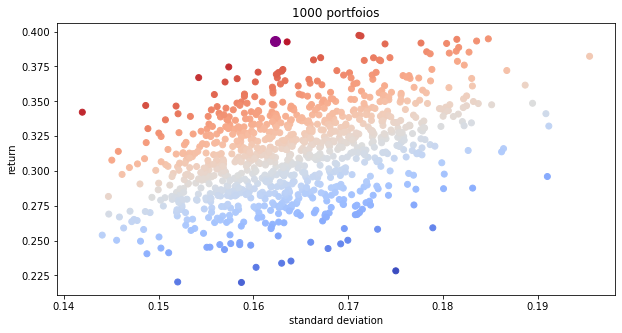

In [54]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df3["std"],y=df3["ret"],c=df3["sharpe"], cmap= "coolwarm")
plt.scatter(x=std2,y=ret2,color="purple",s=100,marker="o")
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('1000 portfoios');

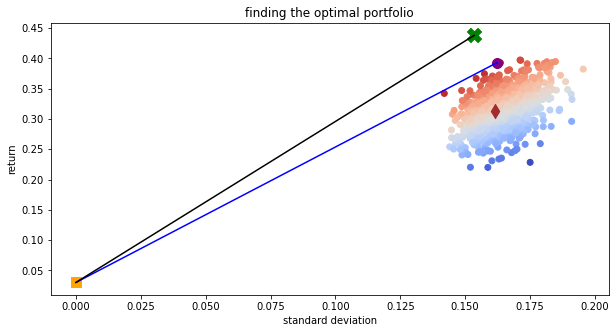

In [55]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df3["std"],y=df3["ret"],c=df3["sharpe"], cmap="coolwarm")
plt.scatter(x=std1,y=ret1,color="brown",s=100,marker="d")
plt.scatter(x=std2,y=ret2,color="purple",s=100,marker="o")
plt.scatter(x=std3,y=ret3,color="green",s=200, marker="X")
plt.scatter(x=0,y=0.03,color="orange",s=100, marker="s")
plt.plot([0,std2],[0.03,ret2],color="blue")
plt.plot([0,std3],[0.03,ret3],color="black")
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('finding the optimal portfolio');

### visualize the weights of individual stocks 

In [56]:
weight=pd.DataFrame({"equal":w1,"simulation":w2,"optimal":w3})
weight

,equal,simulation,optimal
AAPL,0.111111,0.220264,3.622240e-01
AMZN,0.111111,0.016329,1.044276e-15
META,0.111111,0.172435,8.102626e-04
GOOGL,0.111111,0.059911,2.485940e-16
IBM,0.111111,0.082903,0.000000e+00
INTC,0.111111,0.049319,2.219904e-17
MSFT,0.111111,0.177466,2.166431e-01
ORCL,0.111111,0.032442,2.047787e-16
WMT,0.111111,0.188932,4.203227e-01


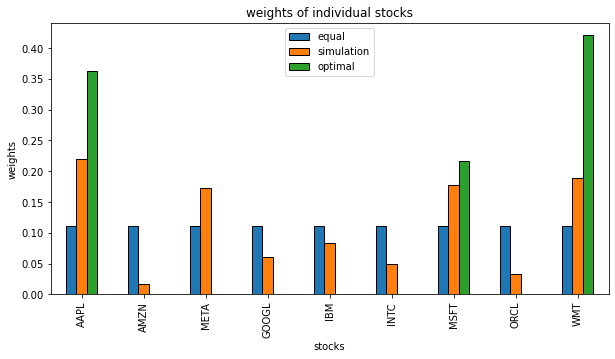

In [57]:
# plot(kind="bar")
weight.plot(kind="bar",figsize = (10,5), edgecolor='black')
plt.xlabel('stocks')
plt.ylabel('weights')
plt.title('weights of individual stocks');
# plot a whole dataframe to a bar plot
# each column is assigned a distinct color
# each row is nested in a group along the horizontal axis

In [58]:
# in-class activity 6
# Which portfolio has the largest allocation to AAPL? 